In [1]:
# import packages

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from scipy.stats import zscore

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

In [2]:
# Loading dataset
dataset = pd.read_csv(r"C:/Users/user/Desktop/Hack/train_loan_data (1).csv")

In [3]:
# Display basic information about the dataset
dataset

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,Jul-97,10+ years,Deputy,744,740,E,MORTGAGE,Individual,...,0.0,debt_consolidation,5338,93.6,E1,60 months,Debt consolidation,8,Source Verified,Defaulted
1,CA,40000.0,Apr-87,10+ years,Department of Veterans Affairs,724,720,B,RENT,Individual,...,0.0,debt_consolidation,19944,60.3,B1,36 months,Credit Loan,12,Verified,Paid
2,FL,60000.0,Aug-07,10+ years,Marble polishing,679,675,B,MORTGAGE,Individual,...,0.0,debt_consolidation,23199,88.5,B5,36 months,Debt consolidation,16,Source Verified,Paid
3,IL,100742.0,Sep-80,10+ years,printer,664,660,B,MORTGAGE,Individual,...,0.0,debt_consolidation,18425,69.0,B2,36 months,Debt consolidation,19,Source Verified,Paid
4,MD,80000.0,Jul-99,10+ years,Southern Mgmt,669,665,F,RENT,Individual,...,0.0,debt_consolidation,34370,90.0,F5,60 months,Debt Connsolidation,59,Verified,Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,SC,81000.0,Feb-00,10+ years,Sports Group Manager,664,660,G,MORTGAGE,Individual,...,0.0,debt_consolidation,20201,93.5,G3,60 months,Debt consolidation,42,Verified,Defaulted
79996,NH,45000.0,Aug-95,10+ years,Web Designer,684,680,C,MORTGAGE,Individual,...,0.0,debt_consolidation,6145,56.9,C1,36 months,Debt consolidation,14,Not Verified,Paid
79997,NY,90000.0,Apr-05,< 1 year,Program Officer,724,720,B,OWN,Individual,...,0.0,debt_consolidation,3910,25.6,B4,36 months,Debt consolidation,26,Source Verified,Paid
79998,TX,94000.0,Apr-92,3 years,Sr. Business Analyst,669,665,D,MORTGAGE,Individual,...,1.0,credit_card,11897,49.4,D5,60 months,Credit card refinancing,48,Source Verified,Paid


# Understanding the data

In [4]:
# Displaying basic information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            80000 non-null  object 
 1   annual_inc            80000 non-null  float64
 2   earliest_cr_line      80000 non-null  object 
 3   emp_length            75412 non-null  object 
 4   emp_title             74982 non-null  object 
 5   fico_range_high       80000 non-null  int64  
 6   fico_range_low        80000 non-null  int64  
 7   grade                 80000 non-null  object 
 8   home_ownership        80000 non-null  object 
 9   application_type      80000 non-null  object 
 10  initial_list_status   80000 non-null  object 
 11  int_rate              80000 non-null  float64
 12  loan_amnt             80000 non-null  int64  
 13  num_actv_bc_tl        76052 non-null  float64
 14  mort_acc              77229 non-null  float64
 15  tot_cur_bal        

In [5]:
len(dataset)

80000

In [6]:
dataset.shape

(80000, 28)

In [7]:
dataset.columns

Index(['addr_state', 'annual_inc', 'earliest_cr_line', 'emp_length',
       'emp_title', 'fico_range_high', 'fico_range_low', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util',
       'sub_grade', 'term', 'title', 'total_acc', 'verification_status',
       'loan_status'],
      dtype='object')

In [8]:
len(dataset.columns)

28

In [9]:
dataset.describe()

,annual_inc,fico_range_high,fico_range_low,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,total_acc
count,8.000000e+04,80000.000000,80000.000000,80000.000000,80000.000000,76052.000000,77229.000000,7.605200e+04,80000.000000,80000.000000,79969.000000,8.000000e+04,79947.000000,80000.000000
mean,7.604614e+04,699.987975,695.987813,13.232898,14403.867813,3.633790,1.674759,1.415864e+05,11.605675,0.216675,0.137103,1.628934e+04,51.899142,25.036875
std,6.902006e+04,31.734840,31.734075,4.771705,8703.826298,2.262505,2.005104,1.593714e+05,5.483362,0.579854,0.383202,2.264915e+04,24.504836,12.009194
min,0.000000e+00,664.000000,660.000000,5.310000,750.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000
25%,4.600000e+04,674.000000,670.000000,9.750000,7925.000000,2.000000,0.000000,2.964200e+04,8.000000,0.000000,0.000000,5.965750e+03,33.500000,16.000000
50%,6.500000e+04,694.000000,690.000000,12.740000,12000.000000,3.000000,1.000000,8.100050e+04,11.000000,0.000000,0.000000,1.111100e+04,52.200000,23.000000
75%,9.000000e+04,714.000000,710.000000,15.990000,20000.000000,5.000000,3.000000,2.110272e+05,14.000000,0.000000,0.000000,1.963500e+04,70.800000,32.000000
max,7.141778e+06,850.000000,845.000000,30.990000,40000.000000,32.000000,32.000000,5.172185e+06,80.000000,24.000000,7.000000,1.023940e+06,152.600000,162.000000


# Missing value treatment

In [10]:
dataset.isnull().sum()

addr_state                 0
annual_inc                 0
earliest_cr_line           0
emp_length              4588
emp_title               5018
fico_range_high            0
fico_range_low             0
grade                      0
home_ownership             0
application_type           0
initial_list_status        0
int_rate                   0
loan_amnt                  0
num_actv_bc_tl          3948
mort_acc                2771
tot_cur_bal             3948
open_acc                   0
pub_rec                    0
pub_rec_bankruptcies      31
purpose                    0
revol_bal                  0
revol_util                53
sub_grade                  0
term                       0
title                    970
total_acc                  0
verification_status        0
loan_status                0
dtype: int64

In [11]:
# Remove rows with missing values
dataset = dataset.dropna()

In [12]:
dataset.isnull().sum()

addr_state              0
annual_inc              0
earliest_cr_line        0
emp_length              0
emp_title               0
fico_range_high         0
fico_range_low          0
grade                   0
home_ownership          0
application_type        0
initial_list_status     0
int_rate                0
loan_amnt               0
num_actv_bc_tl          0
mort_acc                0
tot_cur_bal             0
open_acc                0
pub_rec                 0
pub_rec_bankruptcies    0
purpose                 0
revol_bal               0
revol_util              0
sub_grade               0
term                    0
title                   0
total_acc               0
verification_status     0
loan_status             0
dtype: int64

In [13]:
# Check if any duplicate rows exist in the dataframe
duplicates_exist = dataset.duplicated().any()
print('Duplicate rows exist:', duplicates_exist)
print(f'Number of duplicate rows: {dataset.duplicated().sum()}')

Duplicate rows exist: False
Number of duplicate rows: 0


In [14]:
dataset.shape

(70375, 28)

# Exploratoray Data Analysis

<Figure size 1200x600 with 0 Axes>

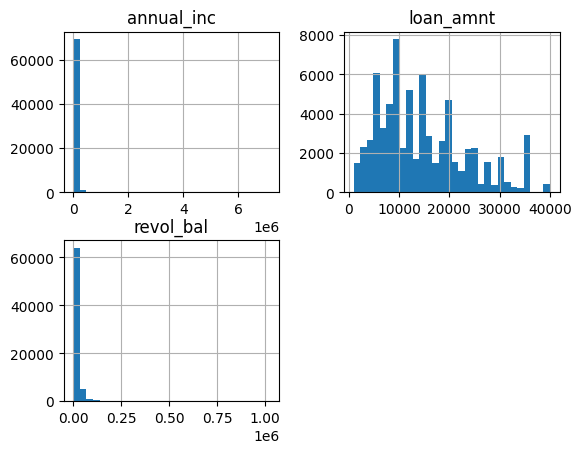

In [15]:
# Visualize numerical features

plt.figure(figsize=(12, 6))
dataset.hist(column=['annual_inc', 'loan_amnt', 'revol_bal'], bins=30)
plt.title('Histogram of Numerical Features')
plt.show()

- The annual income of the borrowers has a wide range, with some outliers having very high incomes.
- The majority of the borrowers have an annual income between 20,000 and 40,000.

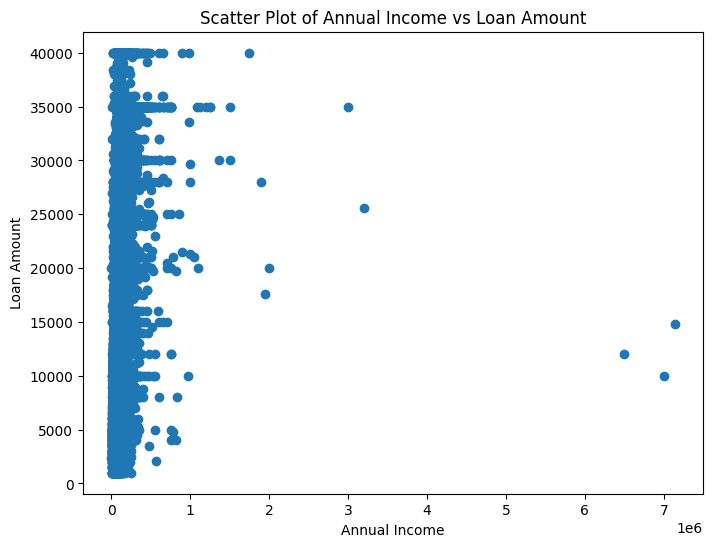

In [16]:
# Create a scatter plot to visualize the relationship between annual income and loan amount

plt.figure(figsize=(8, 6))
plt.scatter(dataset['annual_inc'], dataset['loan_amnt'])
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.title('Scatter Plot of Annual Income vs Loan Amount')
plt.show()

- This plot shows a positive correlation between annual income and loan amount, as expected.
- However, there is a significant amount of scatter, indicating that loan amount is not solely determined by annual income.
- Some borrowers with lower annual incomes have obtained relatively high loan amounts, suggesting other factors are considered in the loan decision.

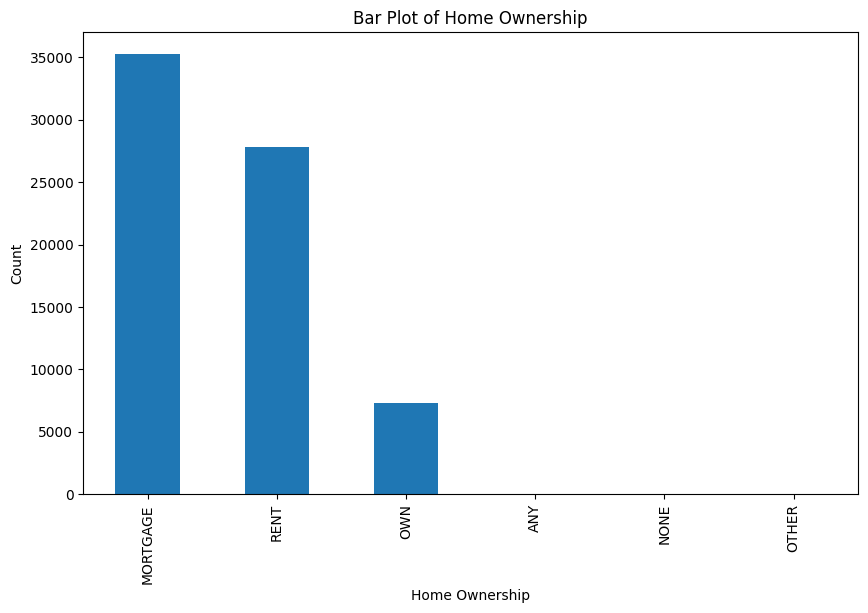

In [17]:
# Visualize the distribution of home ownership types using a bar plot

plt.figure(figsize=(10, 6))
dataset['home_ownership'].value_counts().plot(kind='bar')
plt.title('Bar Plot of Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.show()

- The majority of borrowers have a "MORTGAGE" home ownership status, followed by "RENT" and "OWN".
- This distribution of home ownership types provides insights into the characteristics of the borrower population.

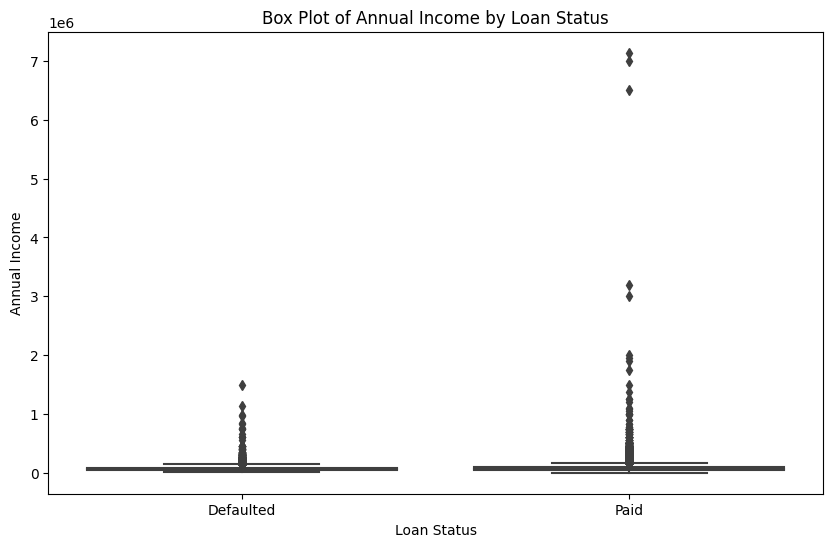

In [18]:
# Visualize the distribution of annual income by loan status

plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='annual_inc', data=dataset)
plt.title('Box Plot of Annual Income by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_11328\2440709928.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


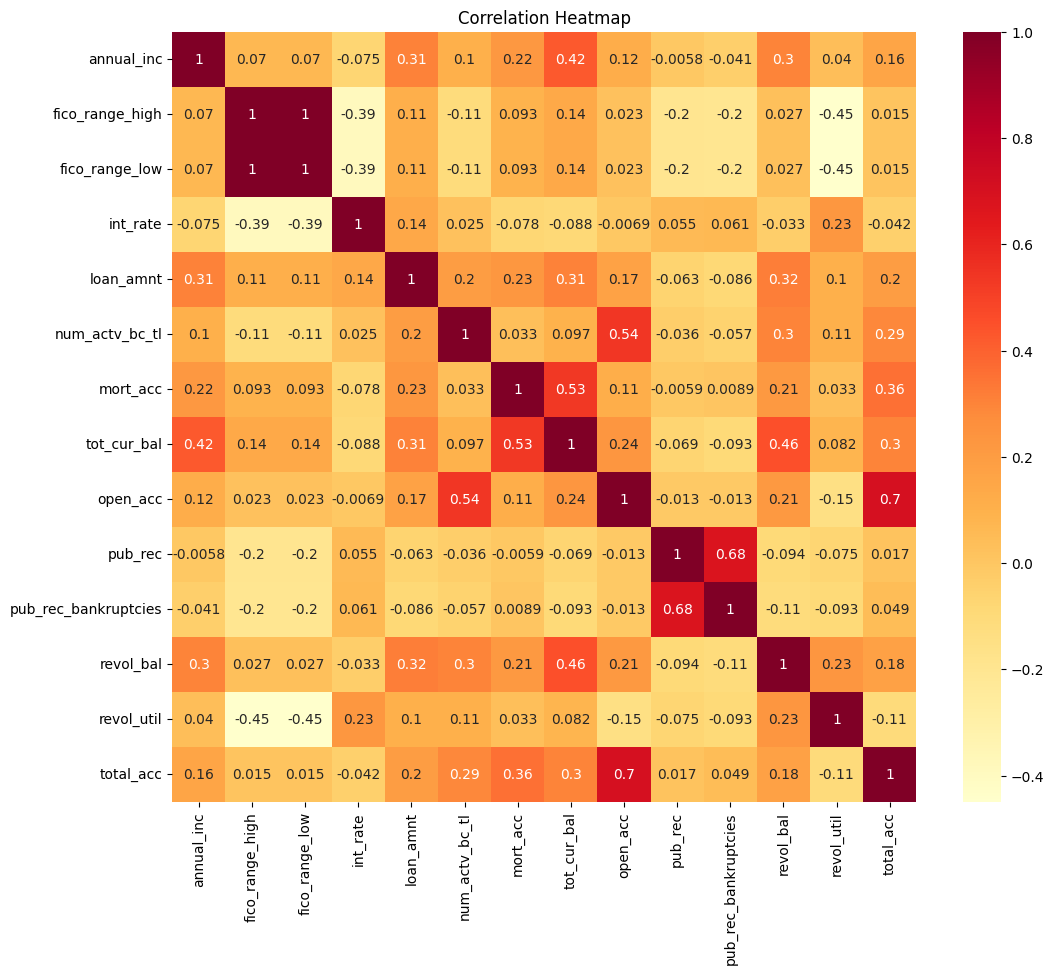

In [19]:
# Visualize the correlation heatmap to understand the relationships between numerical features

plt.figure(figsize=(12, 10))
corr = dataset.corr()
sns.heatmap(corr, annot=True, cmap='YlOrRd')
plt.title('Correlation Heatmap')
plt.show()

- Annual income has a moderate positive correlation with loan amount (0.31).
- FICO score ranges (high and low) have a strong positive correlation (1.0).
- Interest rate has a moderate negative correlation with loan amount.
- Total current balance has a moderate positive correlation with loan amount.

<Figure size 1200x1000 with 0 Axes>

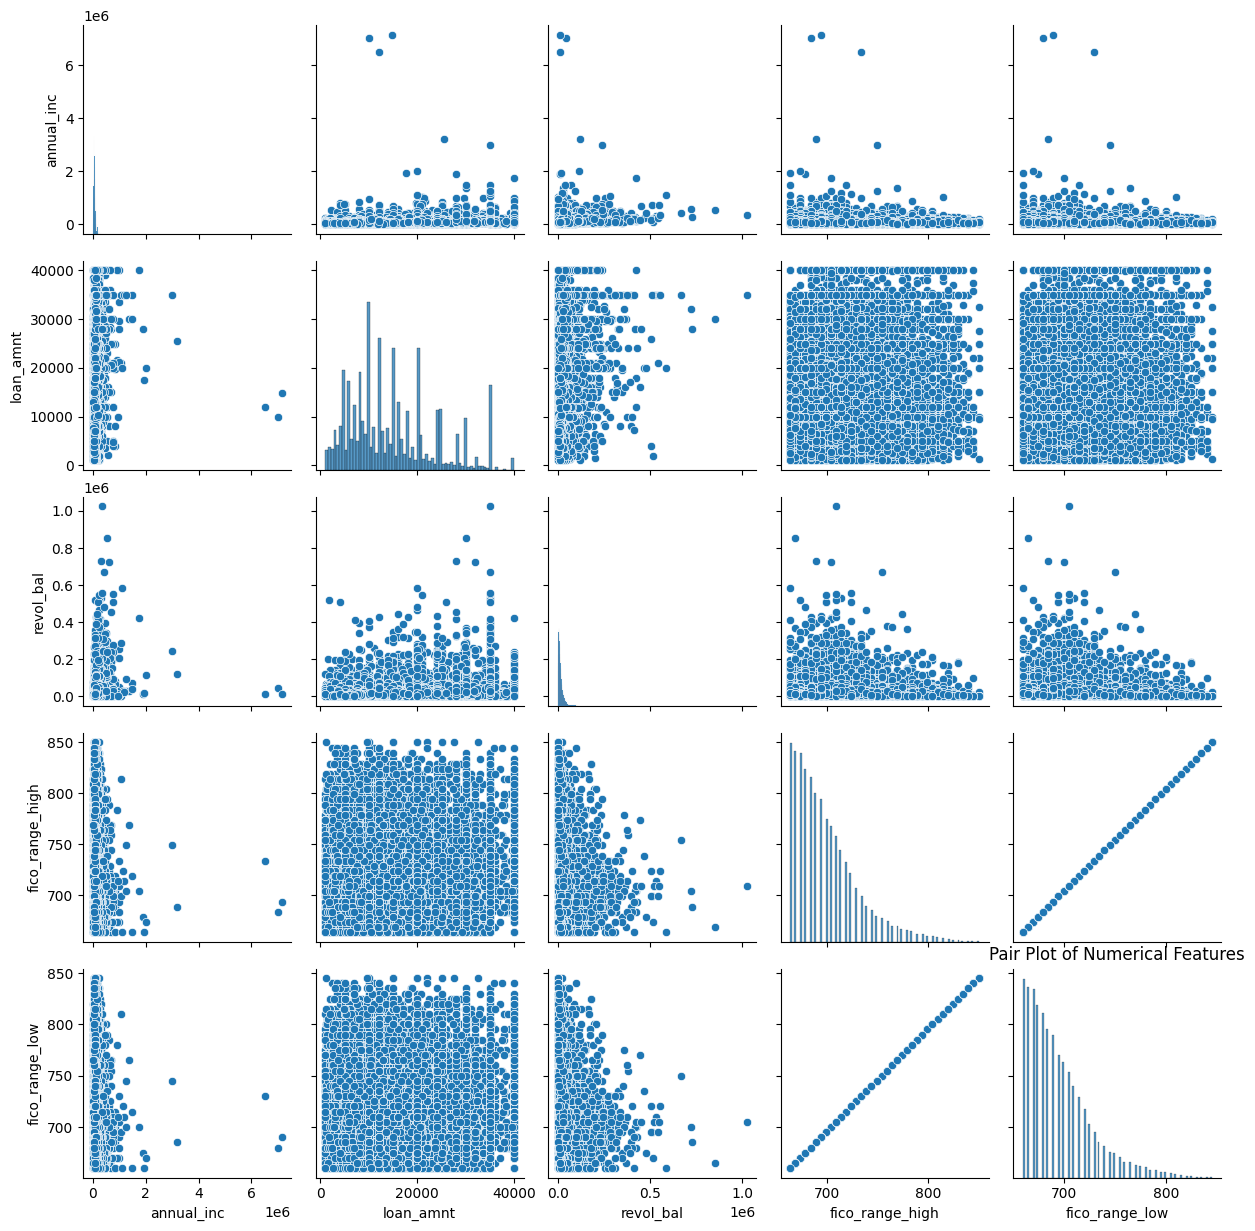

In [20]:
# Visualize pair plots for selected numerical features to explore relationships

plt.figure(figsize=(12, 10))
sns.pairplot(dataset[['annual_inc', 'loan_amnt', 'revol_bal', 'fico_range_high', 'fico_range_low']])
plt.title('Pair Plot of Numerical Features')
plt.show()

In [21]:
# convert categorical columns to numerical values

dataset = dataset.copy()
dataset['home_ownership'] = dataset['home_ownership'].map({'MORTGAGE': 0, 'RENT': 1, 'OWN': 2})
dataset['application_type'] = dataset['application_type'].map({'Individual': 0, 'Joint App': 1})
dataset['initial_list_status'] = dataset['initial_list_status'].map({'w': 0, 'f': 1})
dataset['verification_status'] = dataset['verification_status'].map({'Verified': 0, 'Source Verified': 1, 'Not Verified': 2})


In [22]:
# Transform the categorical data

def data_type(dataset):
    numerical = []
    categorical = []
    for i in dataset.columns:
        if dataset[i].dtype == 'int64' or dataset[i].dtype == 'float64':
            numerical.append(i)
        else:
            categorical.append(i)
    return numerical, categorical

numerical, categorical = data_type(dataset)

def binary_columns(df):
    binary_cols = []
    for col in df.select_dtypes(include=['int','float']).columns:
        unique_values = df[col].unique()
        if np.in1d(unique_values, [0,1]).all():
            binary_cols.append(col)
    return binary_cols
    
binary_cols = binary_columns(dataset)
numerical = [i for i in numerical if i not in binary_cols]

def encoding(dataset, categorical):
    dataset_copy = dataset.copy()  # create a copy of the DataFrame
    for i in categorical:
        dataset_copy[i] = dataset_copy[i].astype('category')
        dataset_copy[i] = dataset_copy[i].cat.codes
    return dataset_copy

encoded_dataset = encoding(dataset, categorical)

encoded_dataset.head()


,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,5,85000.0,305,1,7123,744,740,4,0.0,0,...,0.0,2,5338,93.6,20,1,1030,8,1,0
1,4,40000.0,38,1,7080,724,720,1,1.0,0,...,0.0,2,19944,60.3,5,0,723,12,0,1
2,9,60000.0,58,1,15424,679,675,1,0.0,0,...,0.0,2,23199,88.5,9,0,1030,16,1,1
3,13,100742.0,594,1,31785,664,660,1,0.0,0,...,0.0,2,18425,69.0,6,0,1030,19,1,1
4,19,80000.0,307,1,23993,669,665,5,1.0,0,...,0.0,2,34370,90.0,29,1,879,59,0,1


In [23]:
# Reassign the dataset name to 'dataset'
dataset = encoded_dataset

# Feature scaling

In [24]:
from sklearn.preprocessing import StandardScaler

# Instantiate the scaler
scaler = StandardScaler()

# Fit and transform the selected features
scaled_features = scaler.fit_transform(dataset[['annual_inc', 'fico_range_high', 'fico_range_low', 'int_rate', 'loan_amnt', 'mort_acc', 'tot_cur_bal', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 'revol_util', 'total_acc']])
dataset[['annual_inc', 'fico_range_high', 'fico_range_low', 'int_rate', 'loan_amnt', 'mort_acc', 'tot_cur_bal', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 'revol_util', 'total_acc']] = scaled_features

# Verify the changes
dataset.head()

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,5,0.095961,305,1,7123,1.439797,1.439841,4,0.0,0,...,-0.356268,2,-0.485994,1.704735,20,1,1030,-1.431470,1,0
1,4,-0.532345,38,1,7080,0.797828,0.797854,1,1.0,0,...,-0.356268,2,0.142661,0.334289,5,0,723,-1.099966,0,1
2,9,-0.253098,58,1,15424,-0.646605,-0.646617,1,0.0,0,...,-0.356268,2,0.282759,1.494847,9,0,1030,-0.768463,1,1
3,13,0.315756,594,1,31785,-1.128082,-1.128107,1,0.0,0,...,-0.356268,2,0.077282,0.692333,6,0,1030,-0.519835,1,1
4,19,0.026149,307,1,23993,-0.967590,-0.967610,5,1.0,0,...,-0.356268,2,0.763568,1.556579,29,1,879,2.795199,0,1


# Outlier Detection and Removal using Z-Scores 

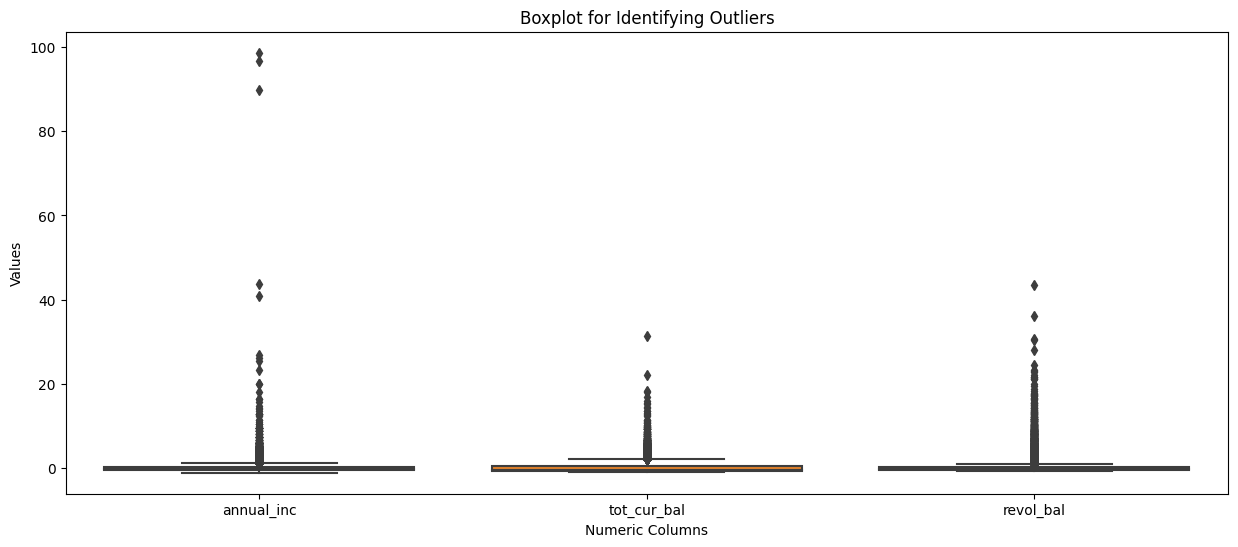

In [25]:
# Visualize boxplots for individual numeric columns
numeric_columns = ['annual_inc', 'tot_cur_bal', 'revol_bal']
plt.figure(figsize=(15, 6))
sns.boxplot(data=dataset[numeric_columns])
plt.title('Boxplot for Identifying Outliers')
plt.xlabel('Numeric Columns')
plt.ylabel('Values')
plt.show()

In [26]:
# Calculate Z-scores for outlier numeric columns
z_scores = dataset[numeric_columns].apply(zscore)

In [27]:
# Threshold for identifying outliers based on Z-scores
z_score_threshold = 3

# Identify outliers
outliers = (z_scores.abs() > z_score_threshold)

In [28]:
# Identify outlier indices and prepare cleaned data by removing outliers
outlier_indices = outliers.any(axis=1)
cleaned_dataset = dataset[~outlier_indices]

In [29]:
# Check the impact of outlier removal
print("Original dataset shape:", dataset.shape)
print("Cleaned dataset shape after removing outliers:", cleaned_dataset.shape)

Original dataset shape: (70375, 28)
Cleaned dataset shape after removing outliers: (68509, 28)


In [30]:
dataset = cleaned_dataset

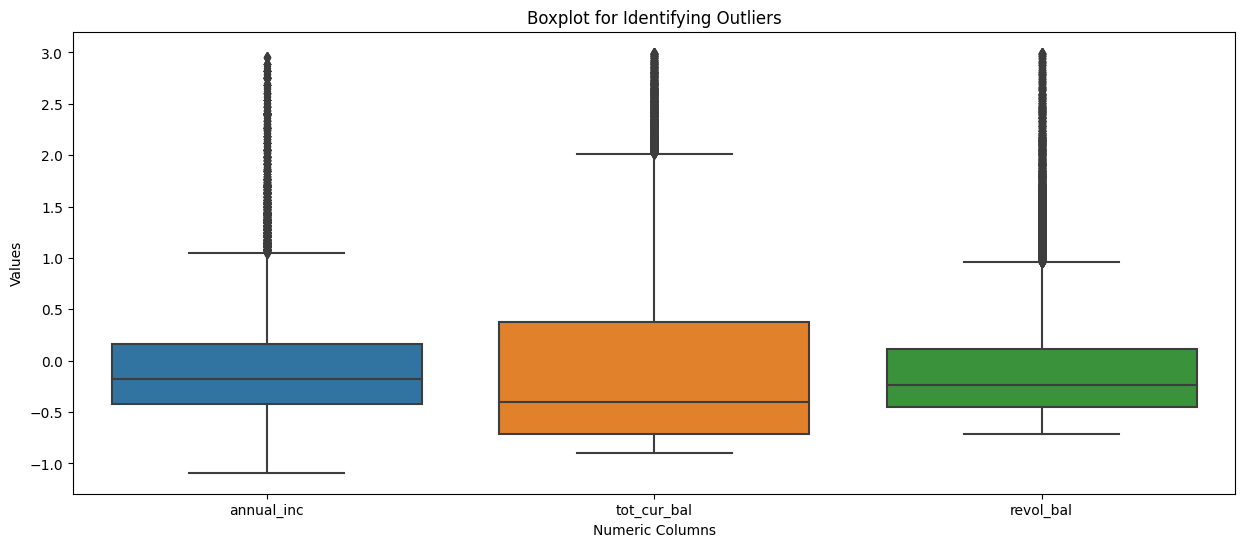

In [31]:
# Visualize boxplots for individual numeric columns after Outlier Detection and Removal using Z-Scores 
numeric_columns = ['annual_inc', 'tot_cur_bal', 'revol_bal']
plt.figure(figsize=(15, 6))
sns.boxplot(data=dataset[numeric_columns])
plt.title('Boxplot for Identifying Outliers')
plt.xlabel('Numeric Columns')
plt.ylabel('Values')
plt.show()

# Feature engineering

In [32]:
# Assign the original DataFrame to a new variable
data = dataset.copy()

# Calculate Credit Utilization Ratio
data['credit_utilization'] = data['revol_bal'] / data['annual_inc']

# Calculate Loan to Annual Income Ratio
data['loan_to_income_ratio'] = data['loan_amnt'] / data['annual_inc']

# Convert 'emp_length' to string type
data['emp_length'] = data['emp_length'].astype(str)

# Extract numerical values from 'emp_length'
data['emp_length_num'] = data['emp_length'].str.extract('(\d+)', expand=False).astype(float)

# Drop original columns after feature engineering
data = data.drop(['revol_bal', 'annual_inc', 'loan_amnt', 'emp_length'], axis=1)

In [33]:
dataset = data

In [34]:
dataset

,addr_state,earliest_cr_line,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,initial_list_status,int_rate,...,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status,credit_utilization,loan_to_income_ratio,emp_length_num
0,5,305,7123,1.439797,1.439841,4,0.0,0,0,1.194998,...,1.704735,20,1,1030,-1.431470,1,0,-5.064511,4.029115,1.0
1,4,38,7080,0.797828,0.797854,1,1.0,0,0,-0.645772,...,0.334289,5,0,723,-1.099966,0,1,-0.267986,1.263736,1.0
2,9,58,15424,-0.646605,-0.646617,1,0.0,0,0,-0.372679,...,1.494847,9,0,1030,-0.768463,1,1,-1.117191,-1.493769,1.0
3,13,594,31785,-1.128082,-1.128107,1,0.0,0,0,-0.854239,...,0.692333,6,0,1030,-0.519835,1,1,0.244752,1.920812,1.0
4,19,307,23993,-0.967590,-0.967610,5,1.0,0,1,2.203982,...,1.556579,29,1,879,2.795199,0,1,29.200785,88.714677,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79994,41,59,18610,-0.325620,-0.325623,3,1.0,0,0,1.203337,...,-0.649305,17,0,1952,-1.265718,1,1,2.301615,4.372911,10.0
79995,39,151,24125,-1.128082,-1.128107,6,0.0,0,0,2.633426,...,1.700619,32,1,1030,1.386310,0,0,3.832404,31.778825,1.0
79996,29,96,28237,-0.486112,-0.486120,2,0.0,0,0,-0.201735,...,0.194363,10,0,1030,-0.934214,2,1,0.975626,1.905145,1.0
79997,33,5,19577,0.797828,0.797854,1,2.0,0,0,-0.472743,...,-1.093774,8,0,1030,0.060296,1,1,-3.302456,-5.298456,10.0


# Feature selection

In [35]:
x = dataset.drop('loan_status', axis=1)
y = dataset['loan_status']

In [36]:
# Impute missing values using mean

from sklearn.impute import SimpleImputer

# Instantiate SimpleImputer with strategy='mean' (other strategies are 'median', 'most_frequent', 'constant')
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on your data
x_imputed = imputer.fit_transform(x)

# Replace the original x with the imputed values
x = pd.DataFrame(x_imputed, columns=x.columns)

In [37]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Build models

## Logistic Regression

In [38]:
# Scale the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [39]:
log_reg = LogisticRegression()

# Train the model
log_reg.fit(x_train_scaled, y_train)

# Make predictions
log_reg_pred = log_reg.predict(x_test_scaled)

# Calculate F1-score
log_reg_f1 = f1_score(y_test, log_reg_pred)
print('Logistic Regression F1-Score:', log_reg_f1)

Logistic Regression F1-Score: 0.8841382732385048


# Random Forest

In [40]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
rf_f1 = f1_score(y_test, rf_pred)
print('Random Forest F1-Score:', rf_f1)

Random Forest F1-Score: 0.8845393110268667


# Gradient Boosting

In [41]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
gb_pred = gb.predict(x_test)
gb_f1 = f1_score(y_test, gb_pred)
print('Gradient Boosting F1-Score:', gb_f1)

Gradient Boosting F1-Score: 0.8860966725330496


# Ensemble techniques

## Bagging

In [42]:
from sklearn.ensemble import BaggingClassifier

# Instantiate the Bagging Classifier without specifying base_estimator
bag = BaggingClassifier()

# Set the base estimator as Logistic Regression
bag.base_estimator = LogisticRegression()

# Train the Bagging Classifier
bag.fit(x_train, y_train)

# Make predictions
bag_pred = bag.predict(x_test)

# Calculate F1-score
bag_f1 = f1_score(y_test, bag_pred)
print('Bagging F1-Score:', bag_f1)

Bagging F1-Score: 0.8571801339479864


# Boosting

In [43]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the AdaBoost Classifier without specifying the base estimator
boost = AdaBoostClassifier()

# Instantiate the base estimator (Decision Tree)
base_estimator = DecisionTreeClassifier(max_depth=1)  # You can adjust max_depth as needed

# Set the base estimator for AdaBoost Classifier
boost.base_estimator_ = base_estimator

# Train the AdaBoost Classifier
boost.fit(x_train, y_train)

# Make predictions
boost_pred = boost.predict(x_test)

# Calculate F1-score
boost_f1 = f1_score(y_test, boost_pred)
print('AdaBoost F1-Score:', boost_f1)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost F1-Score: 0.8848499835146719


# Cross-validation

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
# Define the classifiers
log_reg = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

# Perform cross-validation
log_reg_cv = cross_val_score(log_reg, x, y, cv=3, scoring='f1')
rf_cv = cross_val_score(rf, x, y, cv=3, scoring='f1')
gb_cv = cross_val_score(gb, x, y, cv=3, scoring='f1')

# Calculate and print mean F1-scores
print('Logistic Regression CV F1-Score:', log_reg_cv.mean())
print('Random Forest CV F1-Score:', rf_cv.mean())
print('Gradient Boosting CV F1-Score:', gb_cv.mean())

Logistic Regression CV F1-Score: 0.8876908350842149
Random Forest CV F1-Score: 0.8874044156130273
Gradient Boosting CV F1-Score: 0.8889233930211256


# Grid search and hyperparameter tuning

In [45]:
from sklearn.model_selection import GridSearchCV
log_reg_params = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
log_reg_grid = GridSearchCV(LogisticRegression(), log_reg_params, cv=3, scoring='f1')
log_reg_grid.fit(x, y)
print('Best Logistic Regression Params:', log_reg_grid.best_params_)
print('Best Logistic Regression F1-Score:', log_reg_grid.best_score_)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Best Logistic Regression Params: {'C': 1, 'penalty': 'l2'}
Best Logistic Regression F1-Score: 0.8867086603793832


C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
rf_params = {'n_estimators': [100, 200, 500], 'max_depth': [5, 10, 20]}
rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=3, scoring='f1')
rf_grid.fit(x, y)
print('Best Random Forest Params:', rf_grid.best_params_)
print('Best Random Forest F1-Score:', rf_grid.best_score_)

Best Random Forest Params: {'max_depth': 5, 'n_estimators': 100}
Best Random Forest F1-Score: 0.8897963813303028


In [47]:
gb_params = {'n_estimators': [100, 200, 500], 'learning_rate': [0.1, 0.01, 0.001]}
gb_grid = GridSearchCV(GradientBoostingClassifier(), gb_params, cv=3, scoring='f1')
gb_grid.fit(x, y)
print('Best Gradient Boosting Params:', gb_grid.best_params_)
print('Best Gradient Boosting F1-Score:', gb_grid.best_score_)

Best Gradient Boosting Params: {'learning_rate': 0.01, 'n_estimators': 100}
Best Gradient Boosting F1-Score: 0.8897963813303028


- Gradient Boosting seems to perform well, with a high F1-Score and good cross-validation performance. Its best parameters also indicate optimized hyperparameters.

# SMOTE (Synthetic Minority Over-sampling Technique)

In [48]:
from imblearn.over_sampling import SMOTE

# Resample the dataset using SMOTE
smote = SMOTE(random_state= 42)

# Resample the training dataset using SMOTE
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)
# Check class distribution in the SMOTE oversampled training set

print("Class distribution in the SMOTE oversampled training set:")
print(pd.Series(y_train_smote).value_counts(normalize=True) * 100)

Class distribution in the SMOTE oversampled training set:
1    50.0
0    50.0
Name: loan_status, dtype: float64


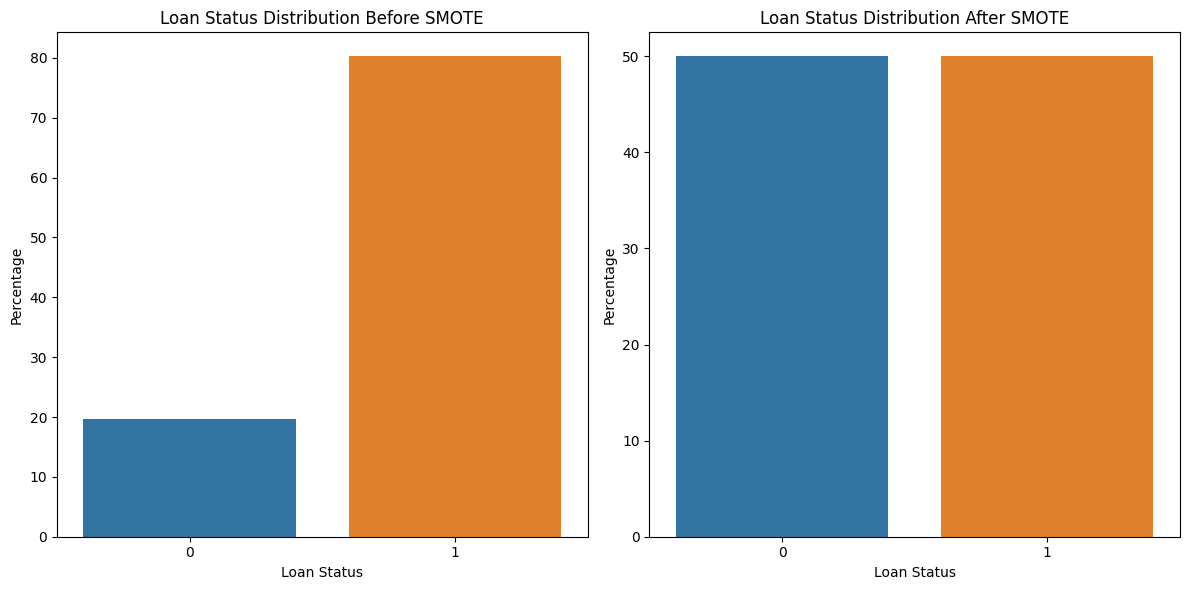

<Figure size 640x480 with 0 Axes>

In [51]:
# Visualize loan status distribution before and after SMOTE
loan_distr_before = pd.Series(y_train).value_counts(normalize=True) * 100
smote_loan_distr = pd.Series(y_train_smote).value_counts(normalize=True) * 100

plt.figure(figsize=(12, 6))  

plt.subplot(1, 2, 1)
sns.barplot(x=loan_distr_before.index, y=loan_distr_before.values)
plt.title('Loan Status Distribution Before SMOTE')
plt.xlabel('Loan Status')
plt.ylabel('Percentage')

plt.subplot(1, 2, 2)
sns.barplot(x=smote_loan_distr.index, y=smote_loan_distr.values)
plt.title('Loan Status Distribution After SMOTE')
plt.xlabel('Loan Status')
plt.ylabel('Percentage')
plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score

# Instantiate SMOTE for oversampling
smote = SMOTE(random_state=42)

# Resample the training dataset using SMOTE
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# Train the Gradient Boosting Classifier on the SMOTE-resampled data
gb.fit(x_train_smote, y_train_smote)

# Make predictions on the test set
gb_pred = gb.predict(x_test)

# Calculate F1-score
gb_f1_smote = f1_score(y_test, gb_pred)

print('Gradient Boosting F1-Score with SMOTE:', gb_f1_smote)

Gradient Boosting F1-Score with SMOTE: 0.8819061060146943


In [53]:
import pickle

# Define the parameters for Gradient Boosting
gb_params = {'n_estimators': [100, 200, 500], 'learning_rate': [0.1, 0.01, 0.001]}
gb_grid = GridSearchCV(GradientBoostingClassifier(), gb_params, cv=3, scoring='f1')
gb_grid.fit(x_train_smote, y_train_smote)

# Get the best Gradient Boosting model
best_gb_model = gb_grid.best_estimator_

# Make predictions using the best model
gb_pred = best_gb_model.predict(x_test)

# Calculate F1-score for Gradient Boosting with SMOTE
gb_f1_smote = f1_score(y_test, gb_pred)

print('Best Gradient Boosting F1-Score with SMOTE:', gb_f1_smote)

# Save the best Gradient Boosting model to a file
path_to_saved_model = "C:/Users/user/Desktop/Hack/best_model_gb_smote.pkl"
with open(path_to_saved_model, 'wb') as file:
    pickle.dump(best_gb_model, file)

print("Best Gradient Boosting model with SMOTE saved successfully as 'best_model_gb_smote.pkl'")

Best Gradient Boosting F1-Score with SMOTE: 0.885389543294069
Best Gradient Boosting model with SMOTE saved successfully as 'best_model_gb_smote.pkl'


# Testing the Model

In [54]:
# Load the trained model

best_model = pickle.load(open('C:/Users/user/Desktop/Hack/best_model_gb_smote.pkl', 'rb'))

In [56]:
# Loading dataset
test_dataset = pd.read_csv(r"C:/Users/user/Desktop/Hack/test_loan_data (1).csv")

In [58]:
# Display basic information about the dataset
test_dataset

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status
0,MO,50000.0,May-2012,1 year,Tower technician,719.0,715.0,C,OWN,Individual,...,0.0,0.0,debt_consolidation,2568.0,9.8,C4,36 months,Debt consolidation,11.0,Source Verified
1,HI,92000.0,Dec-2001,10+ years,Supervisor,684.0,680.0,B,RENT,Individual,...,0.0,0.0,debt_consolidation,30394.0,75.4,B2,36 months,Debt consolidation,35.0,Source Verified
2,TX,89000.0,Mar-1989,10+ years,APPLICATIONS PROGRAMMER,679.0,675.0,B,MORTGAGE,Individual,...,0.0,0.0,credit_card,38400.0,75.3,B2,60 months,Credit card refinancing,41.0,Not Verified
3,CA,33000.0,Nov-2004,9 years,San Diego Unified School District,674.0,670.0,C,RENT,Individual,...,1.0,1.0,debt_consolidation,21224.0,69.4,C1,36 months,Breathing Room,16.0,Not Verified
4,MI,35580.0,Feb-1997,NaN,NaN,704.0,700.0,B,MORTGAGE,Individual,...,0.0,0.0,debt_consolidation,3471.0,39.4,B5,36 months,debitconsolidation,19.0,Verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,MO,38500.0,Sep-2010,4 years,lighting coordinator,679.0,675.0,D,RENT,Individual,...,0.0,0.0,debt_consolidation,5816.0,60.0,D4,36 months,Debt consolidation,10.0,Not Verified
19996,VA,80000.0,Dec-1998,3 years,Contract & Compliance Manager,674.0,670.0,D,MORTGAGE,Individual,...,0.0,0.0,debt_consolidation,13886.0,75.1,D4,60 months,Debt consolidation,30.0,Source Verified
19997,TX,95000.0,May-1996,10+ years,Pharmacist,729.0,725.0,B,MORTGAGE,Individual,...,0.0,0.0,debt_consolidation,43166.0,60.7,B5,36 months,Debt consolidation,29.0,Source Verified
19998,FL,35000.0,Mar-2003,10+ years,Manager In Training,809.0,805.0,A,MORTGAGE,Individual,...,0.0,0.0,car,1110.0,4.4,A5,36 months,Car financing,19.0,Not Verified


In [59]:
test_dataset.columns

Index(['addr_state', 'annual_inc', 'earliest_cr_line', 'emp_length',
       'emp_title', 'fico_range_high', 'fico_range_low', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util',
       'sub_grade', 'term', 'title', 'total_acc', 'verification_status'],
      dtype='object')

In [60]:
# Missing value treatment
test_dataset.isnull().sum()

addr_state                 0
annual_inc                 0
earliest_cr_line           0
emp_length              1258
emp_title               1378
fico_range_high            0
fico_range_low             0
grade                      0
home_ownership             0
application_type           0
initial_list_status        0
int_rate                   0
loan_amnt                  0
num_actv_bc_tl          1011
mort_acc                 704
tot_cur_bal             1011
open_acc                   0
pub_rec                    0
pub_rec_bankruptcies      11
purpose                    0
revol_bal                  0
revol_util                13
sub_grade                  0
term                       0
title                    247
total_acc                  0
verification_status        0
dtype: int64

In [61]:
test_dataset = test_dataset.dropna()
test_dataset.isnull().sum()

addr_state              0
annual_inc              0
earliest_cr_line        0
emp_length              0
emp_title               0
fico_range_high         0
fico_range_low          0
grade                   0
home_ownership          0
application_type        0
initial_list_status     0
int_rate                0
loan_amnt               0
num_actv_bc_tl          0
mort_acc                0
tot_cur_bal             0
open_acc                0
pub_rec                 0
pub_rec_bankruptcies    0
purpose                 0
revol_bal               0
revol_util              0
sub_grade               0
term                    0
title                   0
total_acc               0
verification_status     0
dtype: int64

In [62]:
# Check if any duplicate rows exist in the dataframe
duplicates_exist = test_dataset.duplicated().any()
print('Duplicate rows exist:', duplicates_exist)
print(f'Number of duplicate rows: {test_dataset.duplicated().sum()}')

Duplicate rows exist: False
Number of duplicate rows: 0


In [63]:
# convert categorical columns to numerical values

test_dataset = test_dataset.copy()
test_dataset['home_ownership'] = test_dataset['home_ownership'].map({'MORTGAGE': 0, 'RENT': 1, 'OWN': 2})
test_dataset['application_type'] = test_dataset['application_type'].map({'Individual': 0, 'Joint App': 1})
test_dataset['initial_list_status'] = test_dataset['initial_list_status'].map({'w': 0, 'f': 1})
test_dataset['verification_status'] = test_dataset['verification_status'].map({'Verified': 0, 'Source Verified': 1, 'Not Verified': 2})

In [66]:
# Transform the categorical data

def data_type(test_dataset):
    numerical = []
    categorical = []
    for i in test_dataset.columns:
        if test_dataset[i].dtype == 'int64' or test_dataset[i].dtype == 'float64':
            numerical.append(i)
        else:
            categorical.append(i)
    return numerical, categorical

numerical, categorical = data_type(test_dataset)

def binary_columns(df):
    binary_cols = []
    for col in df.select_dtypes(include=['int','float']).columns:
        unique_values = df[col].unique()
        if np.in1d(unique_values, [0,1]).all():
            binary_cols.append(col)
    return binary_cols
    
binary_cols = binary_columns(test_dataset)
numerical = [i for i in numerical if i not in binary_cols]

def encoding(test_dataset, categorical):
    test_dataset_copy = test_dataset.copy()  # create a copy of the DataFrame
    for i in categorical:
        test_dataset_copy[i] = test_dataset_copy[i].astype('category')
        test_dataset_copy[i] = test_dataset_copy[i].cat.codes
    return test_dataset_copy

In [67]:
encoded_dataset = encoding(test_dataset, categorical)

encoded_dataset.head()

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status
0,23,50000.0,406,0,8236,719.0,715.0,2,2.0,0,...,0.0,0.0,2,2568.0,9.8,13,0,336,11.0,1
1,11,92000.0,119,1,7814,684.0,680.0,1,1.0,0,...,0.0,0.0,2,30394.0,75.4,6,0,336,35.0,1
2,42,89000.0,340,1,92,679.0,675.0,1,0.0,0,...,0.0,0.0,1,38400.0,75.3,6,1,244,41.0,2
3,4,33000.0,441,9,6819,674.0,670.0,2,1.0,0,...,1.0,1.0,2,21224.0,69.4,10,0,37,16.0,2
5,23,32510.0,74,1,5311,724.0,720.0,1,0.0,0,...,0.0,0.0,2,15111.0,41.4,6,0,336,25.0,2


In [68]:
# Reassign the dataset name to 'dataset'
test_dataset = encoded_dataset

## Feature scaling

In [69]:
# Instantiate the scaler
test_scaler = StandardScaler()

# Fit and transform the selected features
scaled_features = test_scaler.fit_transform(test_dataset[['annual_inc', 'fico_range_high', 'fico_range_low', 'int_rate', 'loan_amnt', 'mort_acc', 'tot_cur_bal', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 'revol_util', 'total_acc']])
test_dataset[['annual_inc', 'fico_range_high', 'fico_range_low', 'int_rate', 'loan_amnt', 'mort_acc', 'tot_cur_bal', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 'revol_util', 'total_acc']] = scaled_features

# Verify the changes
test_dataset.head()

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status
0,23,-0.320650,406,0,8236,0.639756,0.639772,2,2.0,0,...,-0.364148,-0.349844,2,-0.647509,-1.738507,13,0,336,-1.181799,1
1,11,0.149091,119,1,7814,-0.487263,-0.487268,1,1.0,0,...,-0.364148,-0.349844,2,0.644397,0.965006,6,0,336,0.798932,1
2,42,0.115538,340,1,92,-0.648266,-0.648274,1,0.0,0,...,-0.364148,-0.349844,1,1.016099,0.960885,6,1,244,1.294115,2
3,4,-0.510783,441,9,6819,-0.809269,-0.809280,2,1.0,0,...,1.364415,2.296571,2,0.218652,0.717734,10,0,37,-0.769146,2
5,23,-0.516263,74,1,5311,0.800759,0.800777,1,0.0,0,...,-0.364148,-0.349844,2,-0.065163,-0.436205,6,0,336,-0.026372,2


## Outlier Detection and Removal using Z-Scores

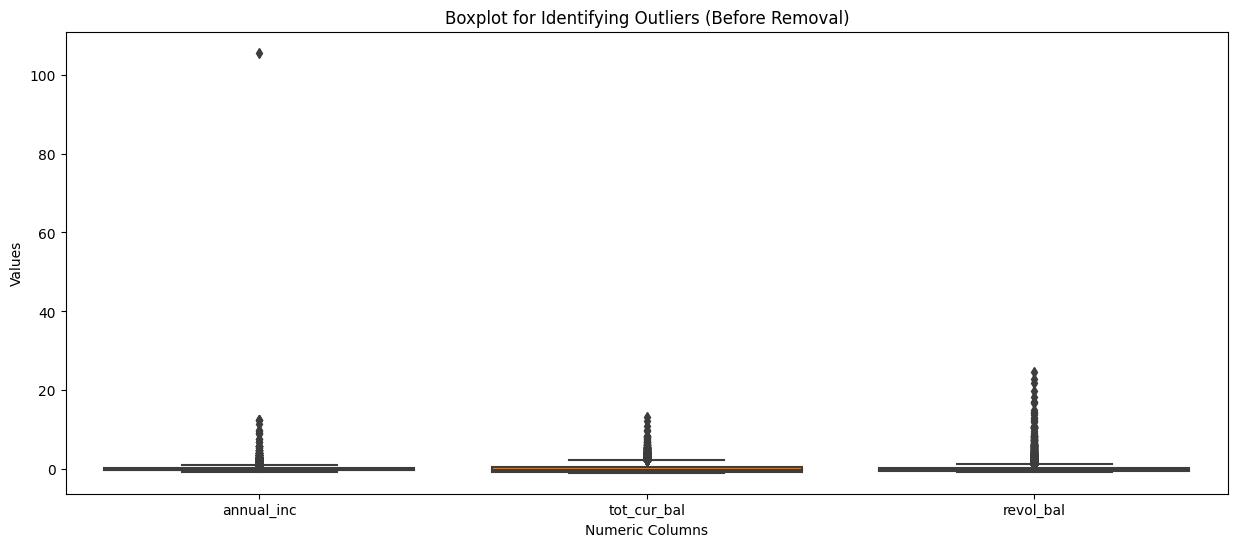

In [84]:
# Visualize boxplots for individual numeric columns
numeric_columns = ['annual_inc', 'tot_cur_bal', 'revol_bal']
plt.figure(figsize=(15, 6))
sns.boxplot(data=test_dataset[numeric_columns])
plt.title('Boxplot for Identifying Outliers (Before Removal)')
plt.xlabel('Numeric Columns')
plt.ylabel('Values')
plt.show()

In [85]:
# Calculate Z-scores for numeric columns in test_dataset
z_scores = test_dataset[numeric_columns].apply(zscore)

# Threshold for identifying outliers based on Z-scores
z_score_threshold = 3

# Identify outliers
outliers = (z_scores.abs() > z_score_threshold)

In [86]:
# Identify outlier indices and prepare cleaned data by removing outliers
outlier_indices = outliers.any(axis=1)
cleaned_dataset = test_dataset[~outlier_indices]

In [87]:
# Check the impact of outlier removal
print("Original dataset shape:", test_dataset.shape)
print("Cleaned dataset shape after removing outliers:", cleaned_dataset.shape)

Original dataset shape: (17459, 27)
Cleaned dataset shape after removing outliers: (16956, 27)


In [88]:
test_dataset = cleaned_dataset

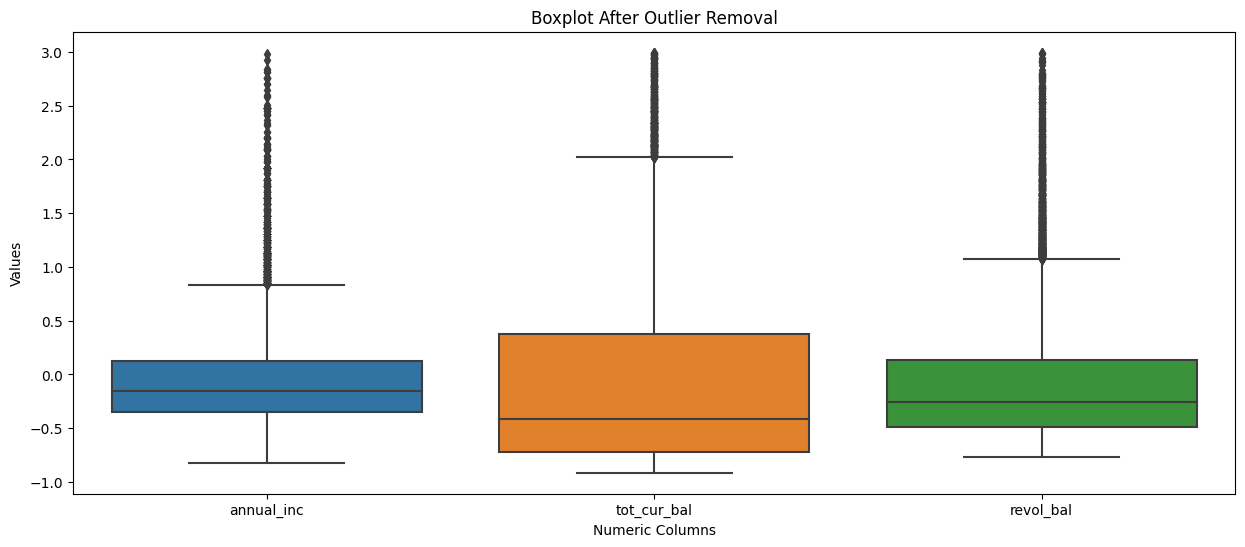

In [89]:
# Visualize boxplots for individual numeric columns after Outlier Detection and Removal using Z-Scores 
numeric_columns = ['annual_inc', 'tot_cur_bal', 'revol_bal']
plt.figure(figsize=(15, 6))
sns.boxplot(data=test_dataset[numeric_columns])
plt.title('Boxplot After Outlier Removal')
plt.xlabel('Numeric Columns')
plt.ylabel('Values')
plt.show()

## Feature engineering

In [90]:
# Assign the original DataFrame to a new variable
test_data = test_dataset.copy()

# Calculate Credit Utilization Ratio
test_data['credit_utilization'] = test_data['revol_bal'] / test_data['annual_inc']

# Calculate Loan to Annual Income Ratio
test_data['loan_to_income_ratio'] = test_data['loan_amnt'] / test_data['annual_inc']

# Convert 'emp_length' to string type
test_data['emp_length'] = test_data['emp_length'].astype(str)

# Extract numerical values from 'emp_length'
test_data['emp_length_num'] = test_data['emp_length'].str.extract('(\d+)', expand=False).astype(float)

# Drop original columns after feature engineering
test_data = test_data.drop(['revol_bal', 'annual_inc', 'loan_amnt', 'emp_length'], axis=1)

In [91]:
test_dataset = test_data

In [92]:
# Impute missing values

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
test_imputed = imputer.fit_transform(test_dataset)

In [93]:
# Replace original data with imputed values
test_dataset = pd.DataFrame(test_imputed, columns=test_dataset.columns)

In [ ]:
# Load the trained model

import pickle
best_model = pickle.load(open('C:/Users/user/Desktop/Hack/best_model_gb_smote.pkl', 'rb'))

In [94]:
# Make predictions on the test dataset
x_test = test_dataset

# x_test = test_dataset.drop('loan_status', axis=1)
y_pred = best_model.predict(x_test)

In [95]:
# Add the predicted loan_status column to the test dataset
test_dataset['loan_status'] = y_pred

In [96]:
# Save the updated test dataset with predictions
test_dataset.to_csv('C:/Users/user/Desktop/Hack/test_loan_data_predictions.csv', index=False)